In [150]:
import pandas as pd 
import numpy as np
import matplotlib
from scipy.stats.mstats import winsorize

In [2]:
df = pd.read_csv("file.csv")

In [3]:
#close price
df.head()

,Date,ETH,BTC,XRP,LTC,XLM,Palladium,Gold,HSI,N225,SP500,NVIDIA,AMD
0,2016-01-01,0.948024,434.33,0.005955,3.51,0.001748,562.00,1060.2,21914.400391,19033.710938,2035.4,32.96,2.87
1,2016-01-02,0.937124,433.44,0.006065,3.50,0.001741,562.00,1060.2,21914.400391,19033.710938,2035.4,32.96,2.87
2,2016-01-03,0.971905,430.01,0.006017,3.48,0.001744,562.00,1060.2,21914.400391,19033.710938,2035.4,32.96,2.87
3,2016-01-04,0.954480,433.09,0.005958,3.50,0.001748,544.20,1075.2,21327.119141,18450.980469,2009.1,32.37,2.77
4,2016-01-05,0.950176,431.96,0.006044,3.47,0.001721,535.75,1078.4,21188.720703,18374.000000,2011.7,32.89,2.75


In [4]:
# no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   ETH        1827 non-null   float64
 2   BTC        1827 non-null   float64
 3   XRP        1827 non-null   float64
 4   LTC        1827 non-null   float64
 5   XLM        1827 non-null   float64
 6   Palladium  1827 non-null   float64
 7   Gold       1827 non-null   float64
 8   HSI        1827 non-null   float64
 9   N225       1827 non-null   float64
 10  SP500      1827 non-null   float64
 11  NVIDIA     1827 non-null   float64
 12  AMD        1827 non-null   float64
dtypes: float64(12), object(1)
memory usage: 185.7+ KB


In [9]:
df.describe()

,ETH,BTC,XRP,LTC,XLM,Palladium,Gold,HSI,N225,SP500,NVIDIA,AMD
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,241.212440,6131.373196,0.288848,57.071834,0.097929,1239.691653,1391.137110,25869.401140,20758.912143,2680.780460,200.687849,26.026719
std,231.644267,4732.385630,0.327973,53.838674,0.117155,573.601789,218.590348,3084.100808,2512.991016,424.863272,127.314333,22.978505
min,0.937124,364.330000,0.005112,3.000000,0.001444,469.800000,1060.200000,18319.580078,14952.019531,1824.500000,25.220000,1.800000
25%,46.590000,1187.840000,0.025938,7.360000,0.002868,788.400000,1251.700000,23754.459961,19282.159180,2359.600000,107.930000,10.920000
50%,194.870000,6416.310000,0.246065,48.210000,0.067262,1015.200000,1302.900000,26129.929688,21275.919922,2711.100000,179.740000,16.270000
75%,324.655000,9218.810000,0.335255,73.490000,0.122353,1619.100000,1487.800000,28187.865235,22594.029297,2941.300000,247.955000,32.720000
max,1396.420000,29001.720000,3.380000,358.340000,0.896227,2711.700000,2069.400000,33154.121094,27568.150391,3712.800000,582.480000,97.120000


In [10]:
counts = []
for col in df.columns:
    na_count = df[df[col].isna()].shape[0]
    counts.append(na_count)

pd.DataFrame(counts, index=df.columns, columns=['NA'])

,NA
Date,0
ETH,0
BTC,0
XRP,0
LTC,0
XLM,0
Palladium,0
Gold,0
HSI,0
N225,0



# Prepocessing : trasformazione del tipo di dati


In [12]:
df.dtypes

Date          object
ETH          float64
BTC          float64
XRP          float64
LTC          float64
XLM          float64
Palladium    float64
Gold         float64
HSI          float64
N225         float64
SP500        float64
NVIDIA       float64
AMD          float64
dtype: object

In [13]:
df['Date'] = pd.to_datetime(df['Date'],format = "%Y-%m-%d")

In [15]:
#df.dtypes

## Grafici preliminari


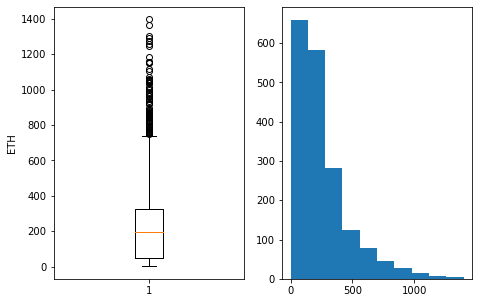

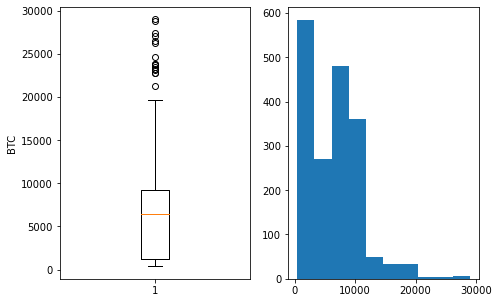

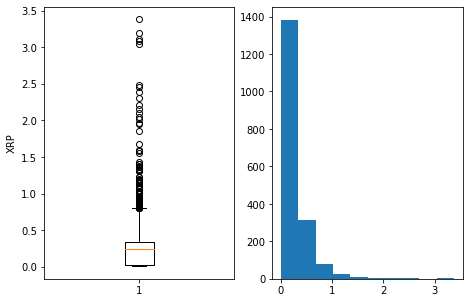

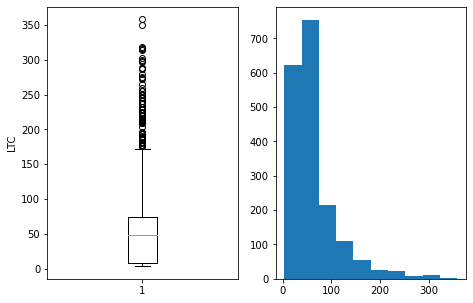

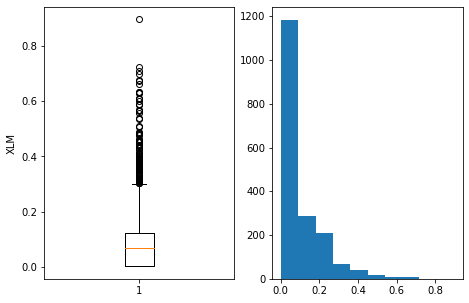

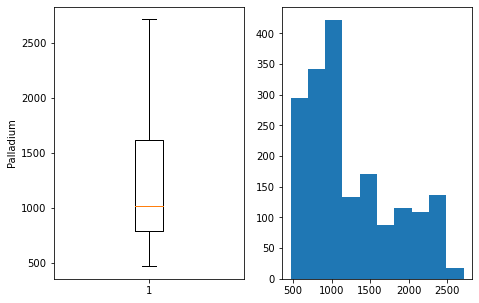

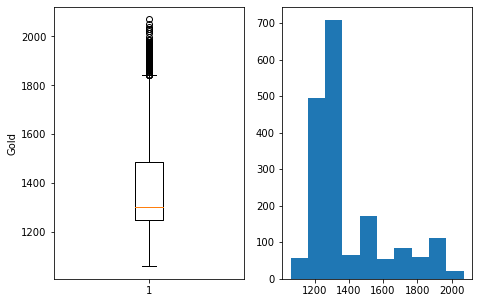

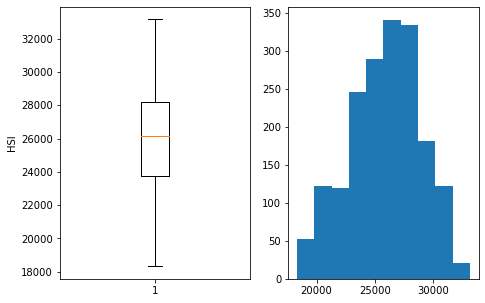

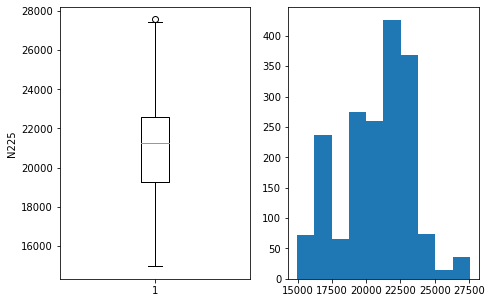

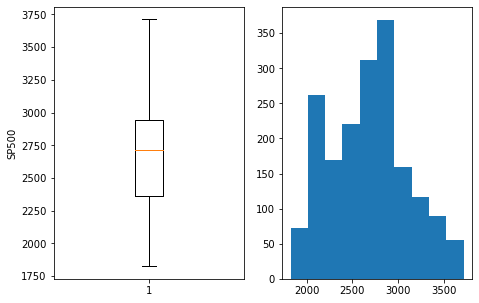

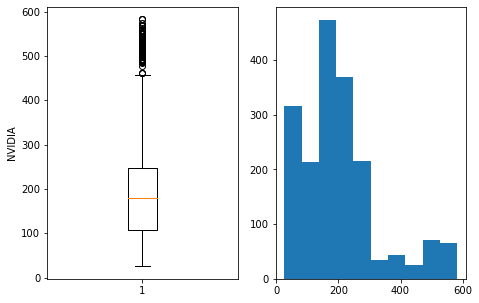

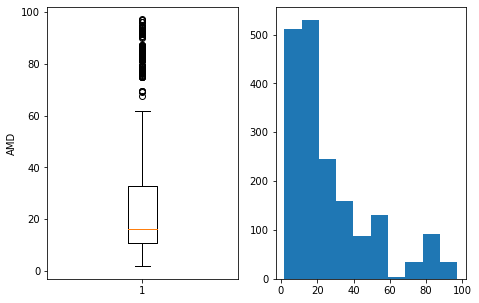

In [16]:
from matplotlib import pyplot as plt
x_axis = range(df.shape[0])

for col in df.columns:
    if df[col].dtypes == 'float64':
        not_na = df[df[col].notna()][col]
        plt.figure(figsize=(7.5, 5))
        plt.subplot(1, 2, 1)
        plt.ylabel(col)
        plt.boxplot(not_na)
        plt.subplot(1, 2, 2)
        plt.hist(not_na, bins=10)
        plt.show()

<AxesSubplot:>

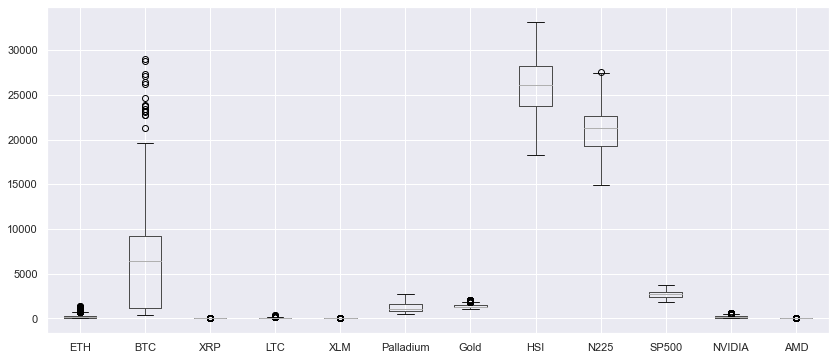

In [68]:
df.boxplot()

In [ ]:
ax = df.groupby(['date', 'name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

In [19]:
newdf = df.copy()

In [20]:
newdf.set_index('Date', inplace=True)

In [45]:
df_cryptocurrencies = newdf[['ETH','BTC','XRP','LTC','XLM']]
df_commodities = newdf[['Palladium','BTC','Gold']]
df_financial_indexes = newdf[['HSI','BTC','N225','SP500']]
df_stock_data = newdf[['NVIDIA','BTC','AMD']]

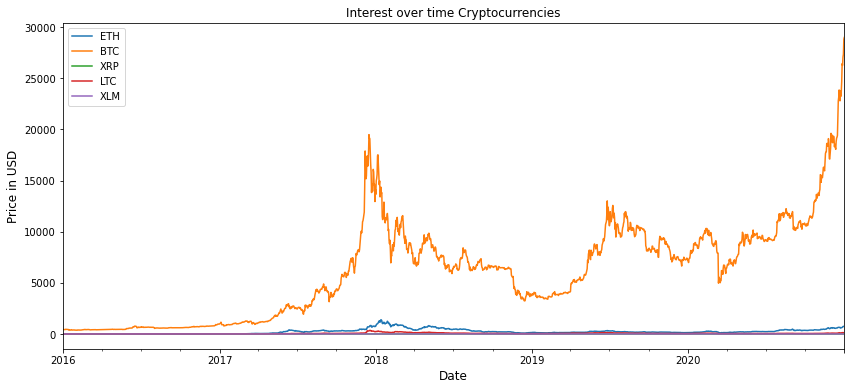

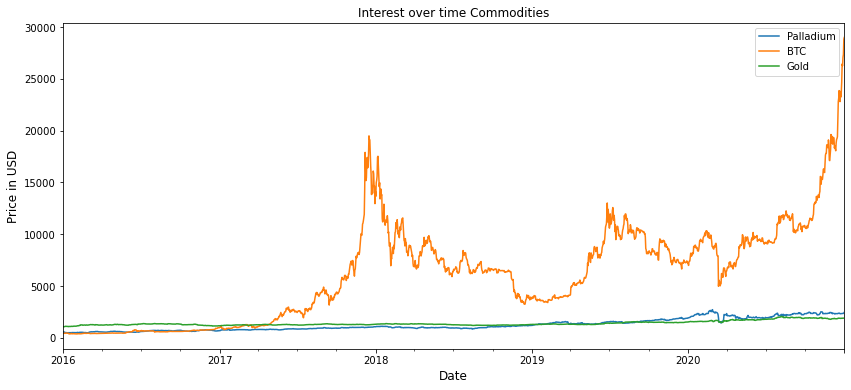

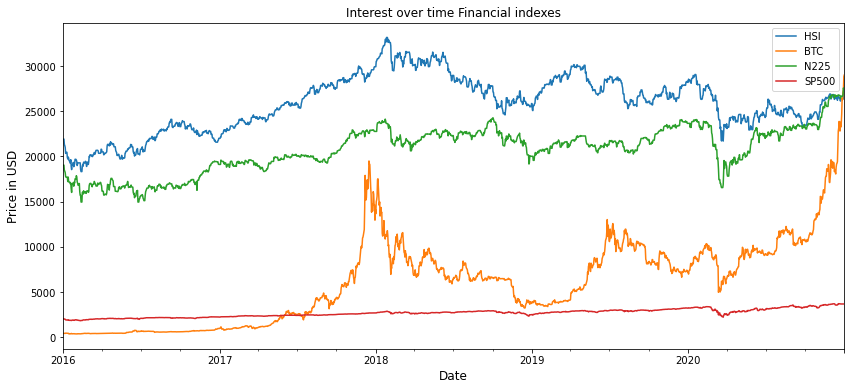

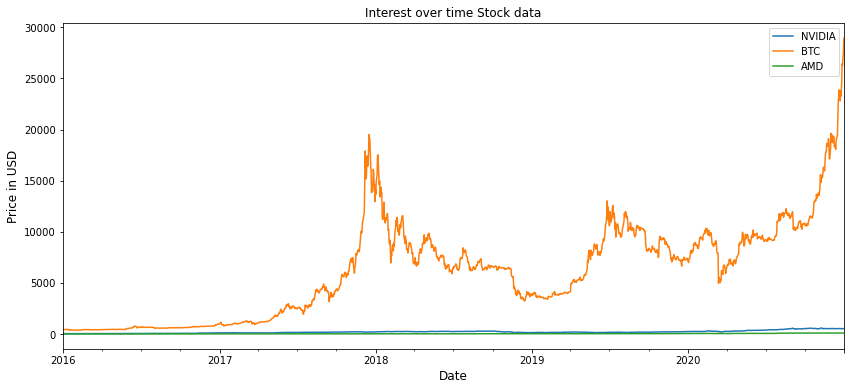

In [47]:
list1 = [df_cryptocurrencies,df_commodities,df_financial_indexes,df_stock_data]
list_name = ['Cryptocurrencies', 'Commodities', 'Financial indexes', 'Stock data']
for i in range(len(list1)):
    
    list1[i].plot(figsize=(14,6))
#df_commodities.plot(figsize=(14,6))
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    plt.title('Interest over time '+ list_name[i]);

,ETH,BTC,XRP,LTC,XLM,Palladium,Gold,HSI,N225,SP500,NVIDIA,AMD
Date,,,,,,,,,,,,
2016-01-01,0.948024,434.33,0.005955,3.51,0.001748,562.00,1060.2,21914.400391,19033.710938,2035.4,32.96,2.87
2016-01-02,0.937124,433.44,0.006065,3.50,0.001741,562.00,1060.2,21914.400391,19033.710938,2035.4,32.96,2.87
2016-01-03,0.971905,430.01,0.006017,3.48,0.001744,562.00,1060.2,21914.400391,19033.710938,2035.4,32.96,2.87
2016-01-04,0.954480,433.09,0.005958,3.50,0.001748,544.20,1075.2,21327.119141,18450.980469,2009.1,32.37,2.77
2016-01-05,0.950176,431.96,0.006044,3.47,0.001721,535.75,1078.4,21188.720703,18374.000000,2011.7,32.89,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,682.640000,26272.29,0.283039,127.52,0.144973,2345.90,1883.2,26386.560547,26656.609375,3681.5,519.75,91.81
2020-12-28,730.400000,27084.81,0.247958,130.05,0.144375,2351.80,1880.4,26314.630859,26854.029297,3681.5,516.00,91.60
2020-12-29,731.520000,27362.44,0.220962,129.04,0.138815,2344.30,1882.9,26568.490234,27568.150391,3681.5,517.73,90.62


Text(0.5, 1.0, 'pearson correlation map')

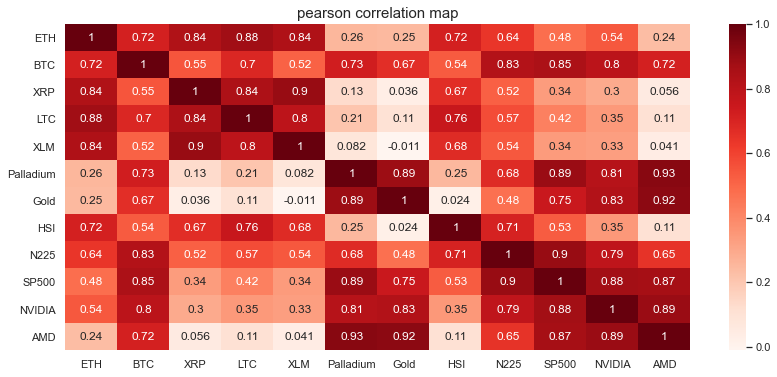

In [96]:
import seaborn as sns
#pearson correlation
data_corr = newdf.iloc[:, :].corr(method = "pearson")
sns.set(rc={"figure.figsize":(14, 6)})
sns.heatmap(data_corr, annot=True, cmap='Reds')
plt.title("pearson correlation map", fontsize=15)



Text(0.5, 1.0, 'kendall correlation map')

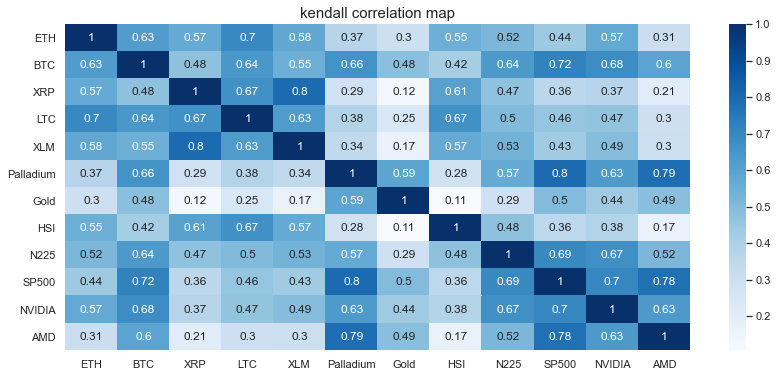

In [97]:
#kendall correlation
data_corr2 = newdf.iloc[:, :].corr(method = 'kendall')
sns.heatmap(data_corr2, annot=True, cmap="Blues")
plt.title("kendall correlation map", fontsize=15)

In [87]:
#sns.pairplot(newdf)

In [74]:
df_2020 = df[df.Date.dt.year >= 2020]

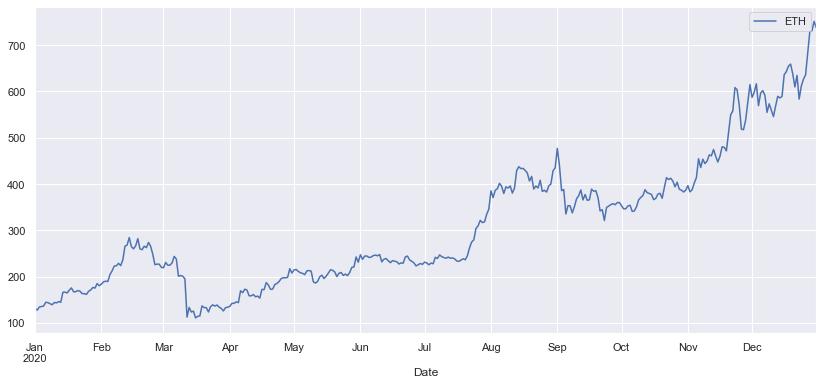

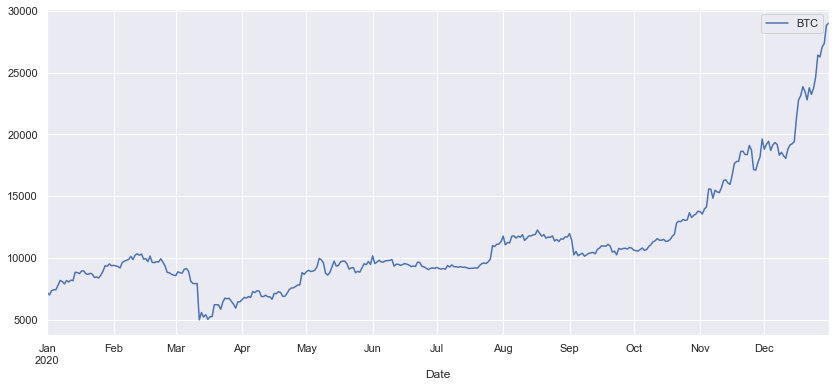

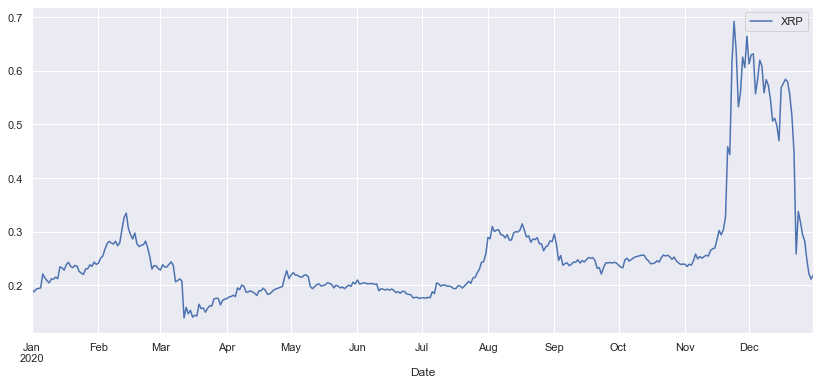

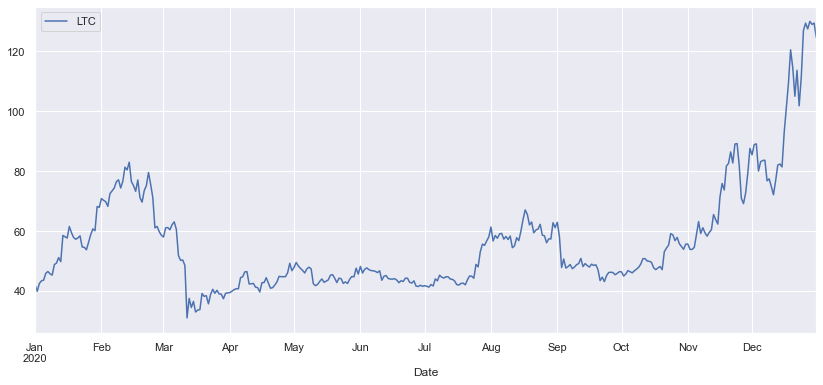

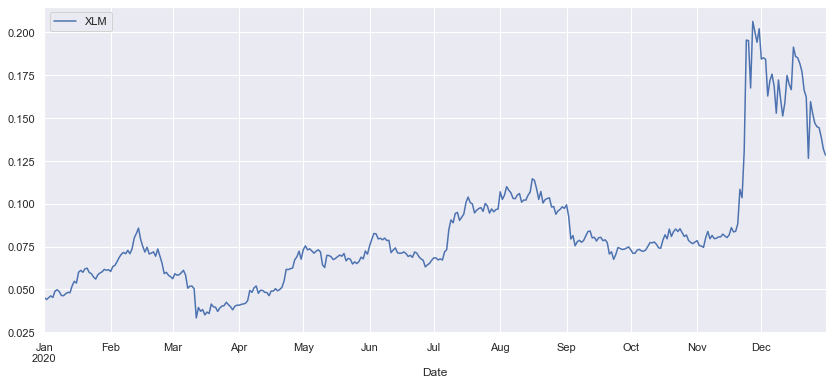

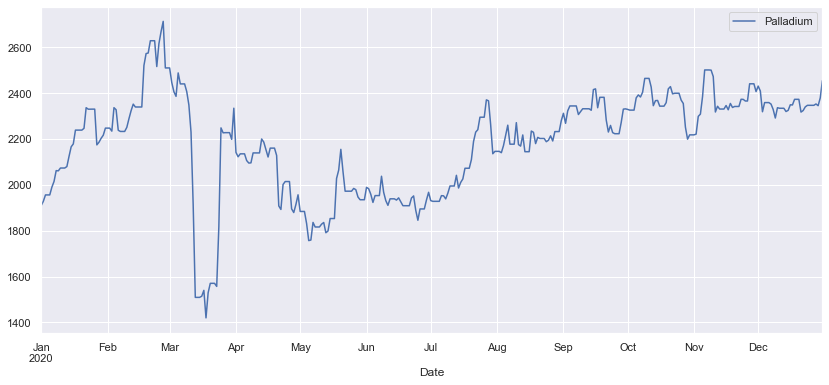

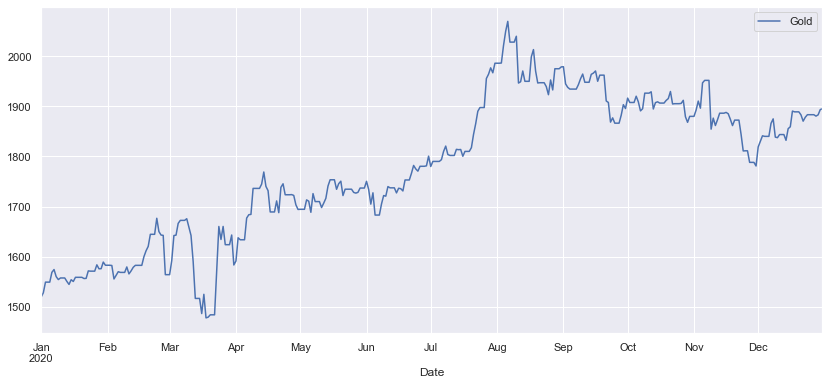

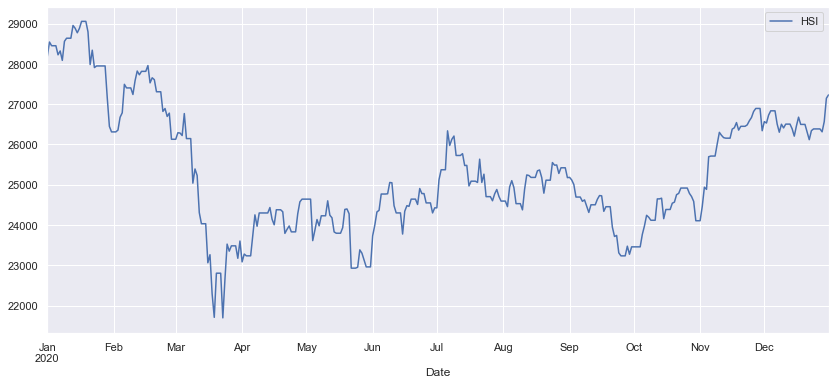

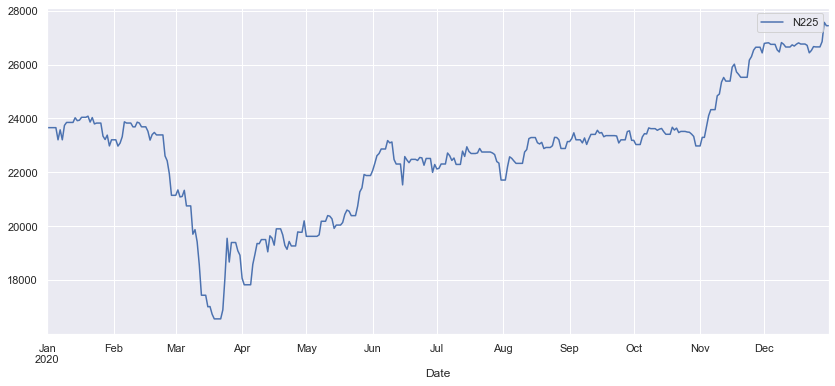

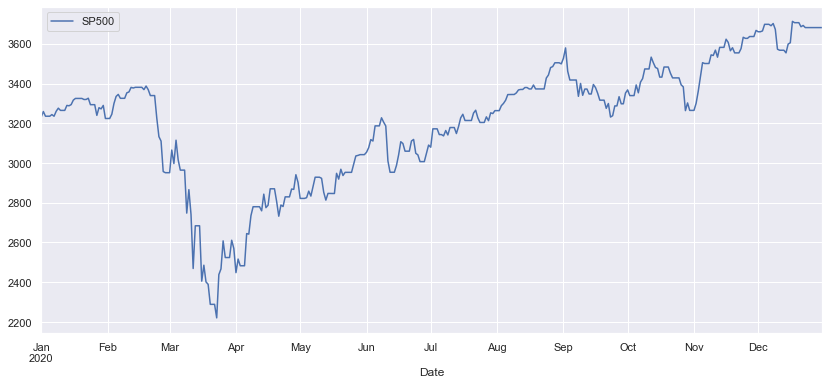

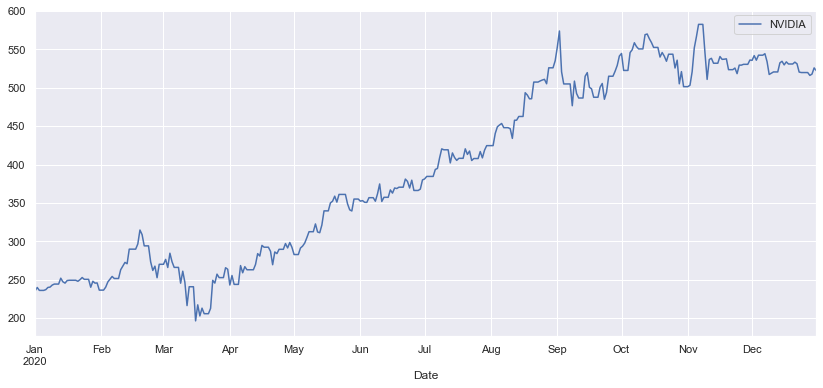

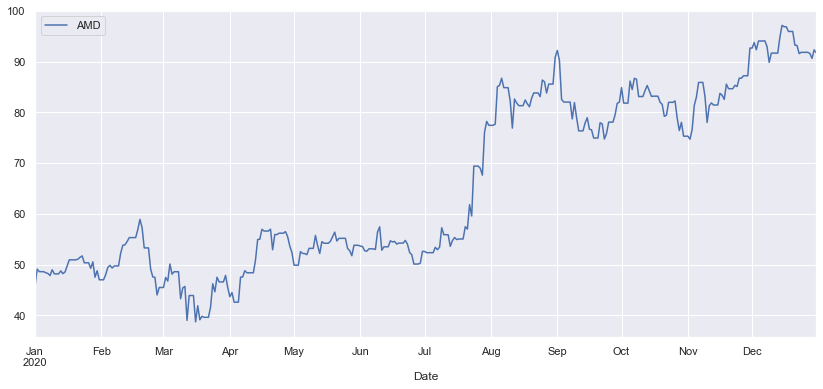

In [86]:
#take exam 2020 year
list2 = list(df_2020.columns[1:])
for i in list2:
    df_2020.plot(x='Date', y=i)

<AxesSubplot:xlabel='Date'>

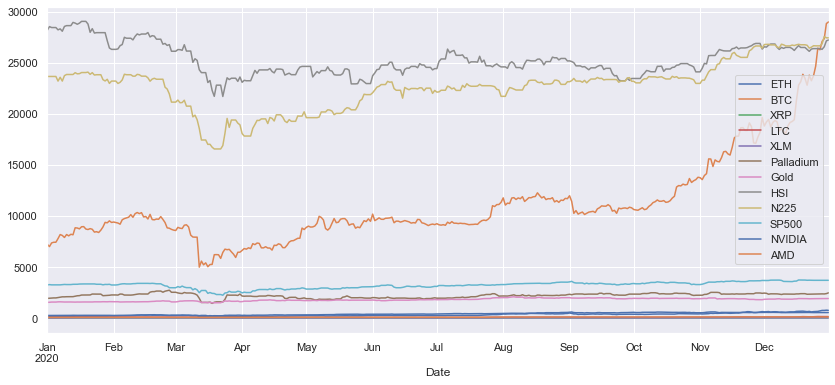

In [88]:
df_2020.plot(x='Date')

## Returns

The returns in coin market is nothing but percentage change in price

In [110]:
df_return = newdf.copy()

In [111]:
df_return = df_return.pct_change()

In [125]:
df_return = df_return.drop(df_return.index[0])


In [126]:
df_return

,ETH,BTC,XRP,LTC,XLM,Palladium,Gold,HSI,N225,SP500,NVIDIA,AMD
Date,,,,,,,,,,,,
2016-01-02,-0.011498,-0.002049,0.018472,-0.002849,-0.004005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-03,0.037115,-0.007913,-0.007914,-0.005714,0.001723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-04,-0.017929,0.007163,-0.009806,0.005747,0.002294,-0.031673,0.014148,-0.026799,-0.030616,-0.012921,-0.017900,-0.034843
2016-01-05,-0.004509,-0.002609,0.014434,-0.008571,-0.015446,-0.015527,0.002976,-0.006489,-0.004172,0.001294,0.016064,-0.007220
2016-01-06,0.000720,-0.006598,-0.006784,-0.005764,-0.028472,-0.057303,0.012519,-0.009812,-0.009942,-0.012825,-0.041350,-0.089091
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.073603,-0.006232,-0.039611,-0.014985,-0.014104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-28,0.069964,0.030927,-0.123944,0.019840,-0.004125,0.002515,-0.001487,-0.002726,0.007406,0.000000,-0.007215,-0.002287
2020-12-29,0.001533,0.010250,-0.108873,-0.007766,-0.038511,-0.003189,0.001330,0.009647,0.026593,0.000000,0.003353,-0.010699


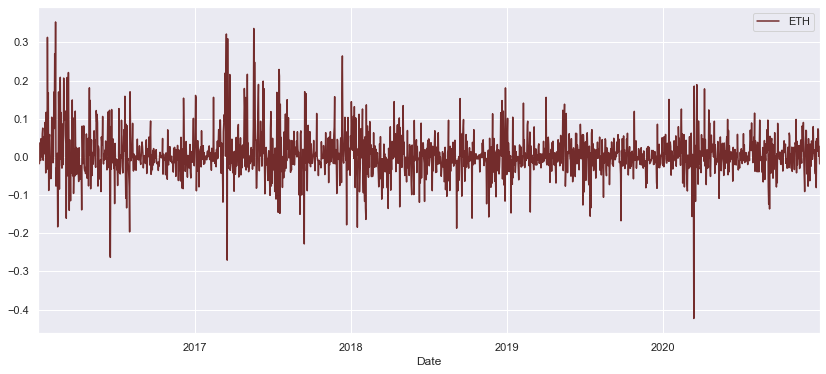

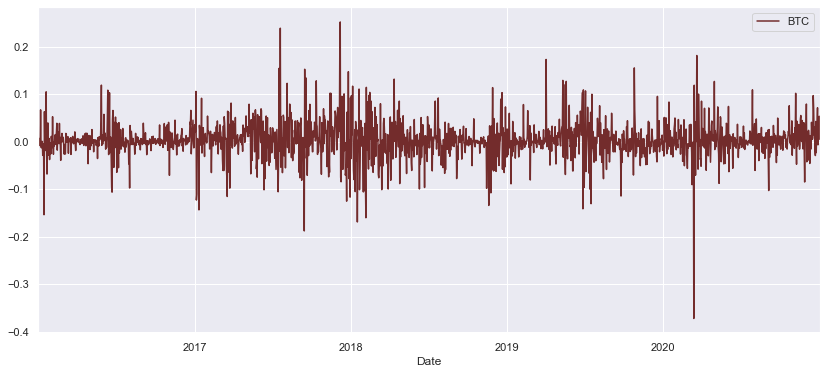

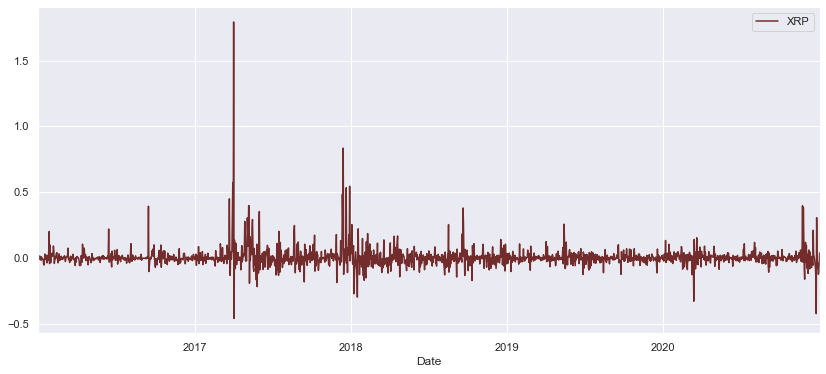

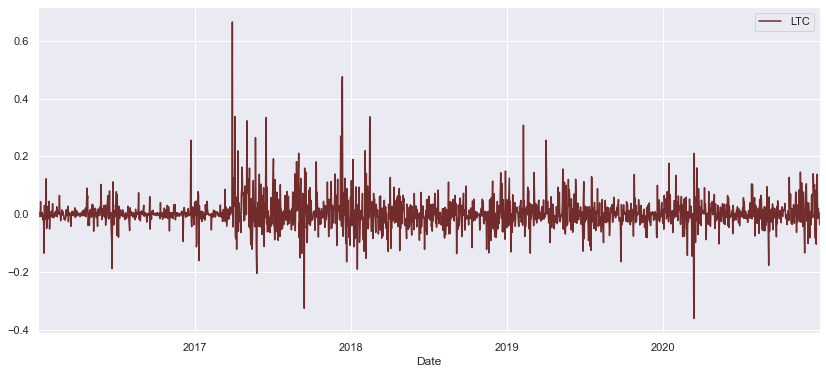

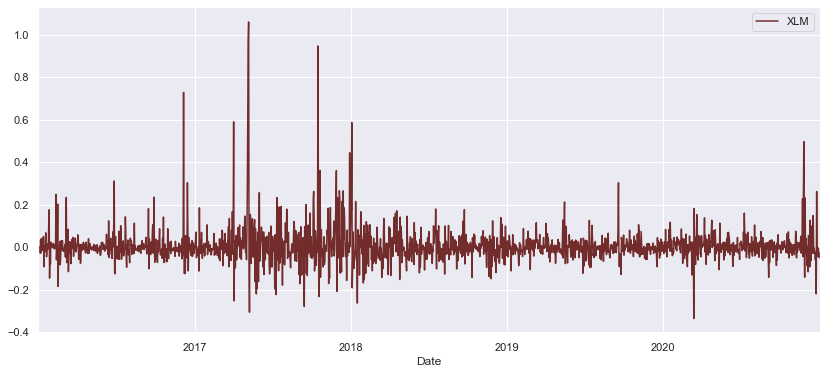

In [138]:
list_return = ['ETH','BTC','XRP','LTC','XLM']
for i in list_return:
    
    df_return.plot( y= i , color='#732C2C')

In [142]:
#df_return.iloc[:, :].corr()
#valori bassi nella correlazione tra return

,ETH,BTC,XRP,LTC,XLM,Palladium,Gold,HSI,N225,SP500,NVIDIA,AMD
ETH,1.000000,0.529428,0.318817,0.503567,0.340380,0.071569,0.081786,0.024886,-0.009203,0.140142,0.120982,0.051791
BTC,0.529428,1.000000,0.322589,0.629320,0.372253,0.079646,0.111552,-0.009399,-0.021633,0.154305,0.116921,0.066428
XRP,0.318817,0.322589,1.000000,0.386531,0.546971,0.055192,0.031609,0.025612,-0.003855,0.096221,0.058596,0.045937
LTC,0.503567,0.629320,0.386531,1.000000,0.392839,0.043279,0.049018,0.021852,-0.018825,0.142068,0.100271,0.065835
XLM,0.340380,0.372253,0.546971,0.392839,1.000000,0.036841,0.009983,0.034632,0.007928,0.104202,0.083315,0.057063
Palladium,0.071569,0.079646,0.055192,0.043279,0.036841,1.000000,0.242369,0.247225,0.247938,0.182410,0.085155,0.096369
Gold,0.081786,0.111552,0.031609,0.049018,0.009983,0.242369,1.000000,-0.021696,-0.048764,0.008117,-0.018589,-0.016883
HSI,0.024886,-0.009399,0.025612,0.021852,0.034632,0.247225,-0.021696,1.000000,0.514065,0.259831,0.161327,0.105699
N225,-0.009203,-0.021633,-0.003855,-0.018825,0.007928,0.247938,-0.048764,0.514065,1.000000,0.220190,0.108440,0.092219
SP500,0.140142,0.154305,0.096221,0.142068,0.104202,0.182410,0.008117,0.259831,0.220190,1.000000,0.590880,0.425915


In [143]:
df.iloc[0]

Date         2016-01-01 00:00:00
ETH                     0.948024
BTC                       434.33
XRP                     0.005955
LTC                         3.51
XLM                     0.001748
Palladium                    562
Gold                      1060.2
HSI                      21914.4
N225                     19033.7
SP500                     2035.4
NVIDIA                     32.96
AMD                         2.87
Name: 0, dtype: object

<AxesSubplot:>

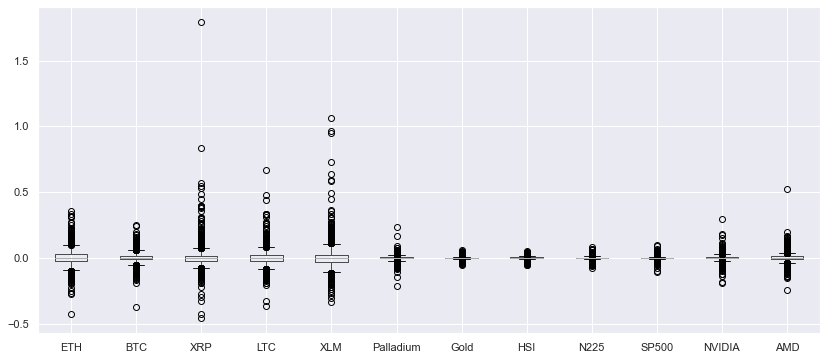

In [144]:
df_return.boxplot()

A lag plot compares data points from each observation in the dataset against data points from a previous observation. So for example, data from December 21st will be compared with data from December 20th, which will in turn be compared with data from December 19th, and so on.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

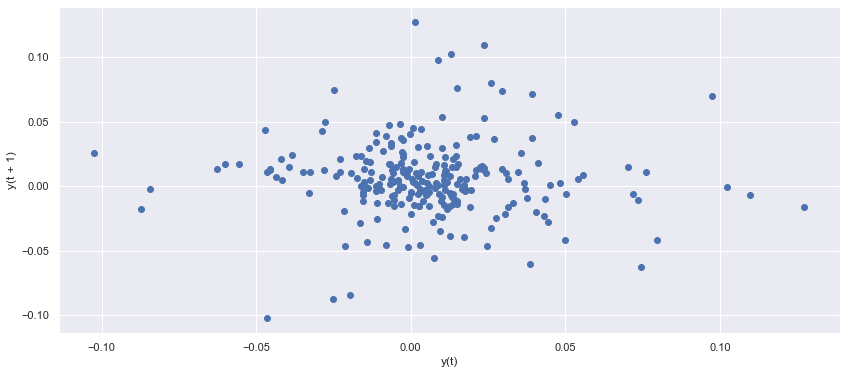

In [146]:
#
from pandas.plotting import lag_plot
lag_plot(df_return['BTC'].tail(250))

In [147]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df_return)

,Feature,Number of Outliers
0,ETH,157
1,BTC,211
2,XRP,213
3,LTC,183
4,XLM,169
5,Palladium,246
6,Gold,315
7,HSI,307
8,N225,317
9,SP500,389


In [148]:
df_return.shape

(1826, 12)

In [151]:
#Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


df_return2 = treat_outliers(df_return)

In [153]:
detect_outliers(df_return2)

,Feature,Number of Outliers
0,ETH,0
1,BTC,110
2,XRP,0
3,LTC,0
4,XLM,0
5,Palladium,136
6,Gold,156
7,HSI,168
8,N225,161
9,SP500,389


<AxesSubplot:>

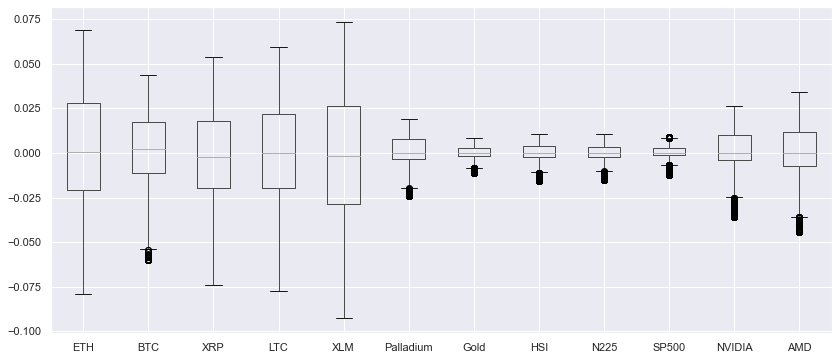

In [154]:
df_return2.boxplot()